This script is used for analyzing distribution of the given dataset.

In [1]:
%%capture
!pip install matplotlib

In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
# If running on Colab, uncomment the following lines
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Global variables

data_dir = "data/"
# Change if on Colab
# data_dir = "drive/MyDrive/data/"

fig_dir = "figures/"

train_path = f"{data_dir}train-claims.json"
dev_path = f"{data_dir}dev-claims.json"
evidence_path = f"{data_dir}evidence.json"

In [5]:
# Load claims, related evidences and labels
# If label is False, return only claims and claim ids
def load_data(path, label=False):
    claimid_list = []
    claim_list = []
    if label:
        evidences_list = []
        label_list = []
    
    with open(path, 'r') as f:
        data = json.load(f)
    for item in data:
        claimid_list.append(item)
        claim_list.append(data[item]['claim_text'])
        if label:
            evidences_list.append(data[item]['evidences'])
            label_list.append(data[item]['claim_label'])
    
    if label:
        return claimid_list, claim_list, evidences_list, label_list
    return claimid_list, claim_list

# Load evidences
def load_evidence(path):
    evidence_list = []
    with open(path, 'r') as f:
        data = json.load(f)
    for item in data:
        evidence_list.append(data[item])
    return evidence_list

In [6]:
train_claim_ids, train_claims, train_evidences, train_labels = load_data(train_path, label=True)
dev_claim_ids, dev_claims, dev_evidences, dev_labels = load_data(dev_path, label=True)
evidence_src = load_evidence(evidence_path)

In [7]:
# Number of claims
print(f"Number of training claims: {len(train_claims)}")
print(f"Number of development claims: {len(dev_claims)}")
print(f"Number of claims: {len(train_claims) + len(dev_claims)}")

Number of training claims: 1228
Number of development claims: 154
Number of claims: 1382


In [8]:
# Number of evidences
print(f"Number of evidences: {len(evidence_src)}")

Number of evidences: 1208827


In [9]:
# Distribution of labels
def label_distribution(labels):
    label_dict = {}
    for label in labels:
        if label in label_dict:
            label_dict[label] += 1
        else:
            label_dict[label] = 1
    return label_dict

In [10]:
train_label_dist = label_distribution(train_labels)
dev_label_dist = label_distribution(dev_labels)
label_dist = label_distribution(train_labels + dev_labels)

In [11]:
train_label_dist

{'DISPUTED': 124, 'REFUTES': 199, 'SUPPORTS': 519, 'NOT_ENOUGH_INFO': 386}

In [12]:
dev_label_dist

{'SUPPORTS': 68, 'NOT_ENOUGH_INFO': 41, 'REFUTES': 27, 'DISPUTED': 18}

In [13]:
label_dist

{'DISPUTED': 142, 'REFUTES': 226, 'SUPPORTS': 587, 'NOT_ENOUGH_INFO': 427}

In [14]:
# Plot the label distribution
def bar_chart(data, save_path=None):
    labels = list(data.keys())
    values = list(data.values())

    plt.bar(labels, values)
    plt.title('Distirbution of Labels')
    plt.xlabel('Labels')
    plt.ylabel('Counts')

    plt.savefig(save_path) if save_path is not None else None
    plt.show()

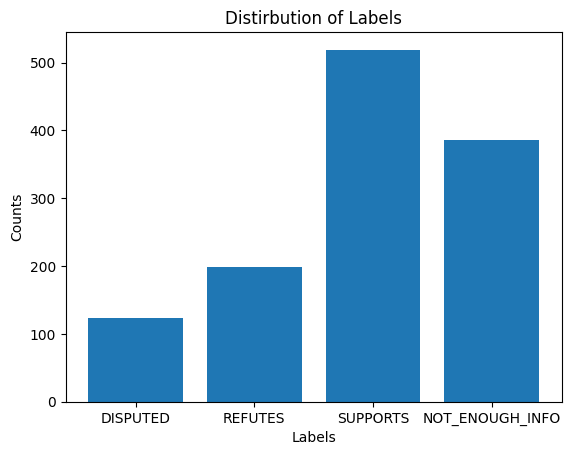

In [15]:
bar_chart(train_label_dist, save_path=f"{fig_dir}train_label_dist.png")

In [16]:
# Count the number of evidences per claim
num_ev_claim = list(map(len, train_evidences + dev_evidences))

In [17]:
max(num_ev_claim)

5

In [18]:
min(num_ev_claim)

1

In [19]:
sum(num_ev_claim) / len(num_ev_claim)

3.337916063675832

In [20]:
dev_claims[0]

'[South Australia] has the most expensive electricity in the world.'

In [21]:
evidence_src[67732]

'[citation needed] South Australia has the highest retail price for electricity in the country.'

In [22]:
evidence_src[572512]

'"South Australia has the highest power prices in the world".'

In [23]:
dev_labels[0]

'SUPPORTS'

End